In [1]:
import feather, math
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
interp_data = pd.read_feather('tmp_data/interp_data')
model_data = pd.read_feather('tmp_data/model_data')
X,y = model_data.drop('SalePrice',axis=1), model_data['SalePrice']

df_keep = pd.read_feather('tmp_data/features_trimmed')

In [3]:
#Train/Test function
def split_vals(a,n):
    return a[:n].copy(), a[n:].copy()

# Determining data sizes
n_test = 12000  # same as Kaggle's test set size
n_train = len(X)-n_test

#Split 
interp_train, interp_test = split_vals(interp_data, n_train)
X_train, X_test = split_vals(df_keep, n_train)
y_train, y_test = split_vals(y, n_train)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((389125, 22), (389125,), (12000, 22), (12000,))

In [4]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    train_err = rmse(m.predict(X_train), y_train)
    train_score = m.score(X_train, y_train)
    test_err = rmse(m.predict(X_test), y_test)
    test_score =  m.score(X_test, y_test)
    print('Train RMSE: {}, Train Accuracy: {}'.format(train_err,train_score))
    print('Validation RMSE: {}, Validation Accuracy: {}'.format(test_err,test_score))
    if hasattr(m, 'oob_score_'):
        print('OOB Score: {}'.format(m.oob_score_))

## One Hot Encoding

### Perform Get Dummies on any feature that is below a given threshold of unique values

In [5]:
def dummify(dataframe,threshold):
    dummy_vars = interp_data.loc[:, interp_data.apply(lambda x: x.nunique()) <= threshold]
    cat_vars = dataframe.drop(columns=dummy_vars.columns)
    dummies = pd.get_dummies(dummy_vars, dummy_na=True,columns=dummy_vars.columns)
    output = pd.concat([cat_vars,dummies],axis=1)
    return output

In [6]:
dummy_df = dummify(X,7)
dummy_df

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,...,saleIs_quarter_end_True,saleIs_quarter_end_nan,saleIs_quarter_start_False,saleIs_quarter_start_True,saleIs_quarter_start_nan,saleIs_year_end_False,saleIs_year_end_True,saleIs_year_end_nan,saleIs_year_start_False,saleIs_year_start_nan
0,1139246,999089,3157,3.0,2004,68.0,949,295,40,-1,...,0,0,1,0,0,1,0,0,1,0
1,1139248,117657,77,3.0,1996,4640.0,1724,526,54,97,...,0,0,1,0,0,1,0,0,1,0
2,1139249,434808,7009,3.0,2001,2838.0,330,109,-1,-1,...,0,0,1,0,0,1,0,0,1,0
3,1139251,1026470,332,3.0,2001,3486.0,3673,1374,-1,44,...,0,0,1,0,0,1,0,0,1,0
4,1139253,1057373,17311,3.0,2007,722.0,4207,1528,-1,-1,...,0,0,1,0,0,1,0,0,1,0
5,1139255,1001274,4605,3.0,2004,508.0,492,174,56,-1,...,0,0,1,0,0,1,0,0,1,0
6,1139256,772701,1937,3.0,1993,11540.0,1452,418,47,-1,...,0,0,1,0,0,1,0,0,1,0
7,1139261,902002,3539,3.0,2001,4883.0,739,242,40,-1,...,0,0,1,0,0,1,0,0,1,0
8,1139272,1036251,36003,3.0,2008,302.0,778,249,61,-1,...,0,0,1,0,0,1,0,0,1,0
9,1139275,1016474,3883,3.0,1000,20700.0,1770,539,20,-1,...,0,0,1,0,0,1,0,0,1,0


In [7]:
X_train, X_test = split_vals(dummy_df, n_train)

In [8]:
X_train.shape,X_test.shape

((389125, 200), (12000, 200))

In [9]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)

CPU times: user 6min 41s, sys: 6.3 s, total: 6min 48s
Wall time: 2min 11s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.6, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [10]:
def print_score(m):
    train_err = rmse(m.predict(X_train), y_train)
    train_score = m.score(X_train, y_train)
    test_err = rmse(m.predict(X_test), y_test)
    test_score =  m.score(X_test, y_test)
    print('Train RMSE: {}, Train Accuracy: {}'.format(train_err,train_score))
    print('Validation RMSE: {}, Validation Accuracy: {}'.format(test_err,test_score))
    if hasattr(m, 'oob_score_'):
        print('OOB Score: {}'.format(m.oob_score_))

In [11]:
print_score(m)

Train RMSE: 4019.2646016753893, Train Accuracy: 0.9694560919191835
Validation RMSE: 7845.465258184997, Validation Accuracy: 0.8953222592606719
OOB Score: 0.9080031105332589


In [12]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)
def plot_fi(fi):
    return fi.plot('cols', 'importance', 'barh', figsize=(12,7), legend=False)

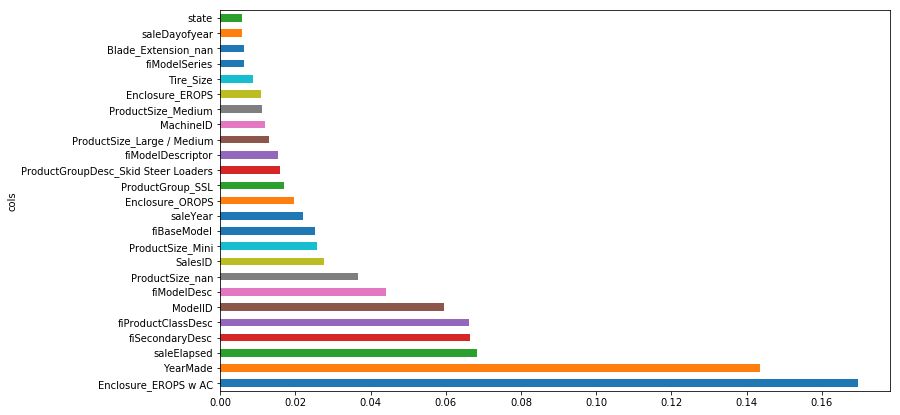

In [13]:
fi = rf_feat_importance(m, dummy_df)
plot_fi(fi[:25]);

## Partial dependence

In [14]:
from pdpbox import pdp
from plotnine import *

In [15]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()

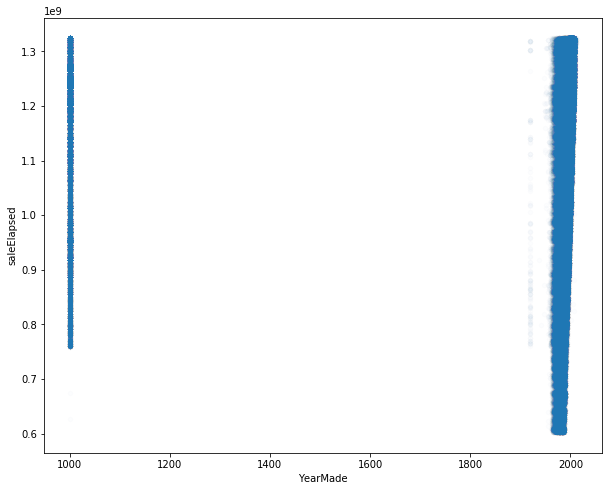

In [16]:
model_data.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [17]:
x_all = get_sample(model_data[model_data.YearMade>1930], 500)

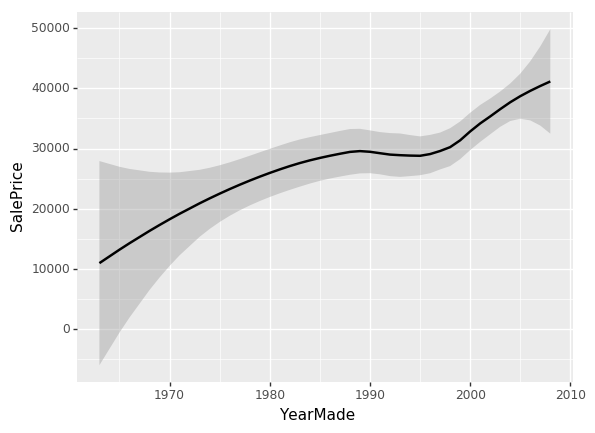

<ggplot: (-9223372029804841521)>

In [18]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [19]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

Index(['SalesID', 'MachineID', 'ModelID', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries',
       ...
       'saleIs_quarter_end_True', 'saleIs_quarter_end_nan',
       'saleIs_quarter_start_False', 'saleIs_quarter_start_True',
       'saleIs_quarter_start_nan', 'saleIs_year_end_False',
       'saleIs_year_end_True', 'saleIs_year_end_nan',
       'saleIs_year_start_False', 'saleIs_year_start_nan'],
      dtype='object', length=200)

In [20]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a38b4eb38>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a38b6e780>})

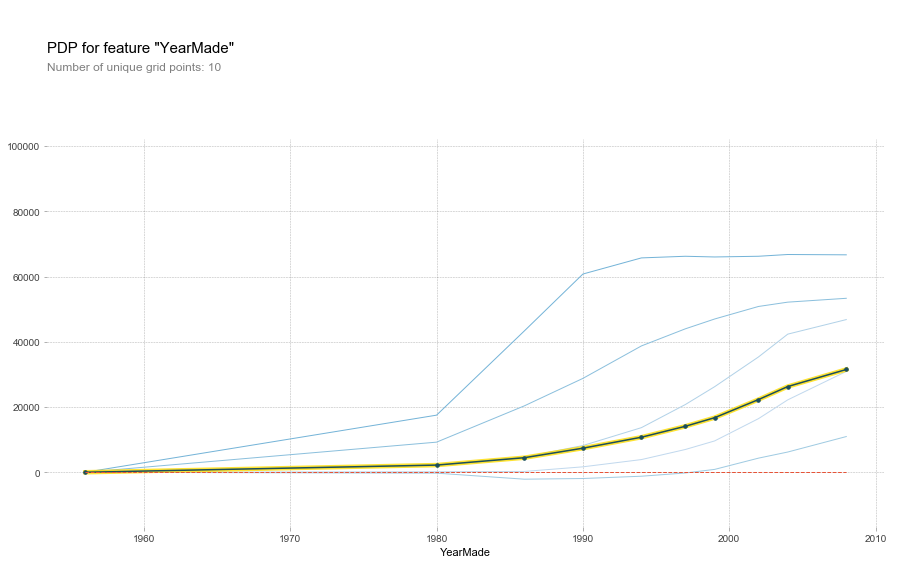

In [21]:
plot_pdp('YearMade', clusters=5)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a3aebab38>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a3aed4518>})

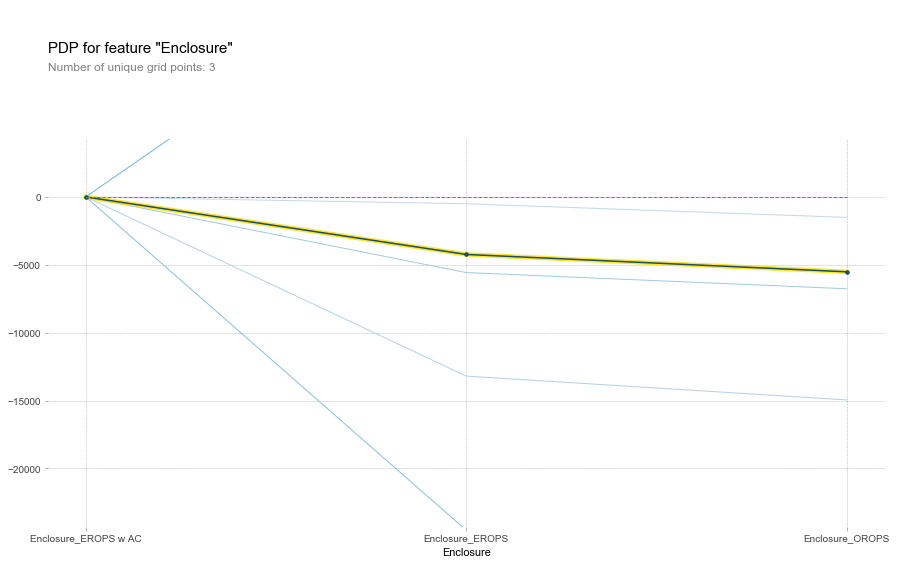

In [22]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a38b04f98>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1a382354a8>})

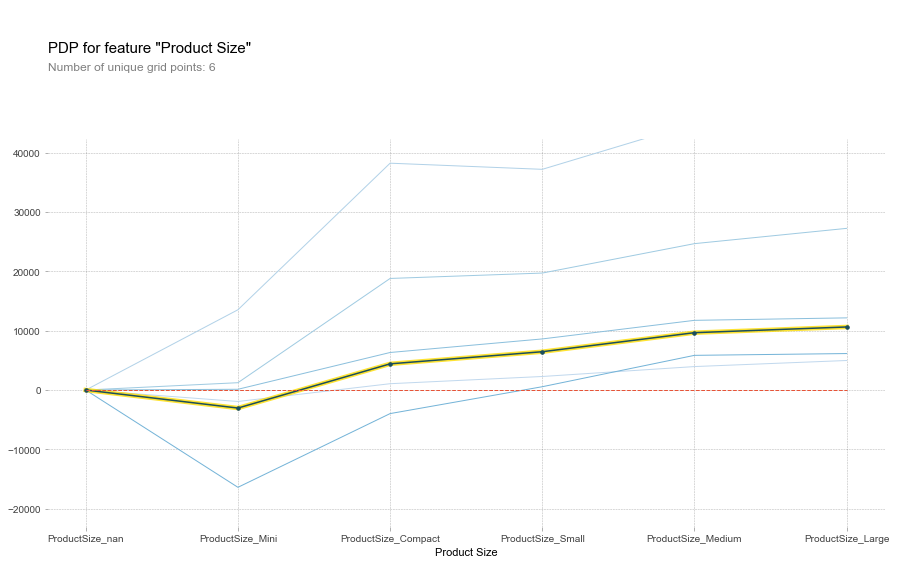

In [33]:
plot_pdp(['ProductSize_nan', 'ProductSize_Mini', 'ProductSize_Compact','ProductSize_Small','ProductSize_Medium','ProductSize_Large'], 5, 'Product Size')
          
          
          
          
          
          

In [ ]:
plot_pdp([None, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large','Compact'], 5, 'ProductSize')

In [26]:
model_data.YearMade[model_data.YearMade<1950] = 1950
# model_data['age'] = model_data.saleYear-model_data.YearMade 
# df_keep.YearMade[df_keep.YearMade<1950] = 1950
# df_keep['age'] = model_data.saleYear-model_data.YearMade

/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


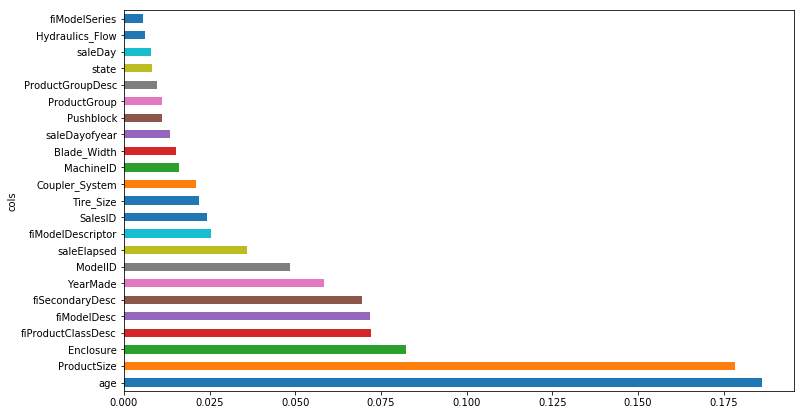

In [32]:
X_train, X_valid = split_vals(df_keep, n_train)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

## Prediction Explanations

In [5]:
import eli5

In [9]:
X_train, X_test = split_vals(df_keep, n_train)

In [10]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

Train RMSE: 4257.545683427191, Train Accuracy: 0.965727164145813
Validation RMSE: 7535.772916830746, Validation Accuracy: 0.9034232604542181
OOB Score: 0.9066855547081544


#### Global Feature Importance

In [11]:
eli5.show_weights(m,feature_names=list(df_keep.columns))

Weight,Feature
0.1927 ± 0.0775,YearMade
0.1495 ± 0.1132,ProductSize
0.0923 ± 0.0104,saleElapsed
0.0812 ± 0.0554,fiSecondaryDesc
0.0689 ± 0.0596,fiModelDesc
0.0643 ± 0.1567,Enclosure
0.0538 ± 0.0614,fiProductClassDesc
0.0493 ± 0.0355,ModelID
0.0402 ± 0.0164,SalesID
0.0395 ± 0.0806,fiModelDescriptor


#### Individual Prediction Explanations

In [12]:
eli5.show_prediction(m, df_keep.iloc[0], 
                     feature_names=list(df_keep.columns),
                     show_feature_values=True)

## Final Model

In [38]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_test = split_vals(df_subs, n_train)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

In [39]:
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [40]:
print_score(m)

Train RMSE: 4668.613123848894, Train Accuracy: 0.9587895667094479
Validation RMSE: 7272.093712748561, Validation Accuracy: 0.910063523852951
OOB Score: 0.9077961515802524


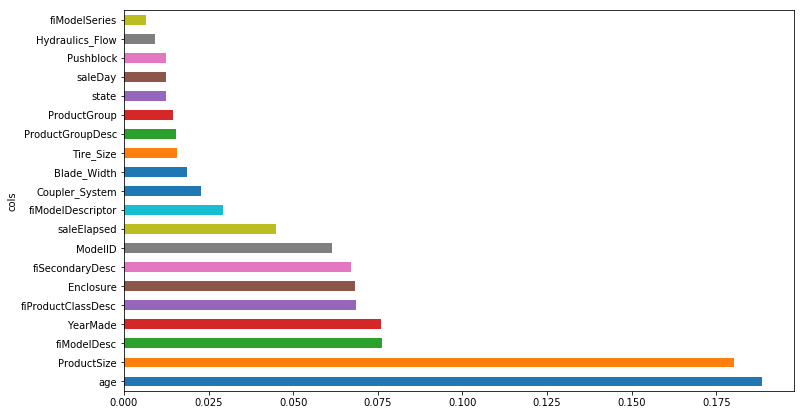

In [36]:
plot_fi(rf_feat_importance(m, X_train));
